In [1]:
import numpy as np
import os
os.chdir('/home/ia404/gitreps/dustbias/mbatch/')
import argparse
import utils as autils
from utils import DUST_TYPES
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from matplotlib import rcParams
rcParams['font.size']=20
rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1
rcParams['xtick.major.pad']='8'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
rcParams['ytick.right'] = True
rcParams['text.usetex'] = True
rcParams['font.family'] = 'Helvetica'

%matplotlib inline

--------------------------------------------------------------------------
detected:

  Local host:            cpu-r-14
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4129

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   cpu-r-14
  Local device: mlx5_0
--------------------------------------------------------------------------


In [27]:
def get_auto_name(patch, mf=True, tag=None):
    if mf:
        return f'auto_patch{patch}_mf{tag}.txt'
    else:
        if tag is None:
            return f'auto_patch{patch}_nomf.txt'
        else:
            return f'auto_patch{patch}_nomf{tag}.txt'

In [28]:
args = argparse.Namespace()
args.config_name='act_dr6v4'
args.mask_type = 'wide_v4_20220316'
args.mask_subproduct = 'lensing_masks'
args.skyfrac = 'GAL070'
args.apodfact = '3dg'
args.mlmax=4000
args.lmax=3000
args.lmin=600
args.filter_whiteamplitude=12.
args.filter_whitefwhm=1.4
args.patches_fsky='0.001'
args.est= 'TT'
args.output_dir = '/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/mbatch_local/'

In [29]:
ell_arr = np.arange(args.mlmax+1)
lfac =  (ell_arr * (ell_arr + 1))**2 / (2 * np.pi)
lfac_2pt = ell_arr * (ell_arr + 1)
lcut = 500
nbands = 100
lbands = np.concatenate((np.linspace(2, lcut)[:-1], np.logspace(np.log10(lcut), np.log10(args.mlmax), nbands+1)))#  dtype=int)

In [30]:
npatches = {'0.01': 33, '0.001': 117}
npatches = npatches[args.patches_fsky]

In [32]:
path_auto_mf_gauss = lambda x: os.path.join(args.output_dir + 'stage_auto_mf_gauss', x)
path_auto_n0_gauss = lambda x: os.path.join(args.output_dir + 'stage_auto_n0_gauss', x)

path_auto_mf_d9 = lambda x: os.path.join(args.output_dir + 'stage_auto_mf_d9', x)
path_auto_n0_d9 = lambda x: os.path.join(args.output_dir + 'stage_auto_n0_d9', x)

In [35]:
raw_4pt_g = {}
rawmf_4pt_g = {}
for n in range(npatches):
    try:
        rawmf_4pt_g[n] = np.loadtxt(path_auto_mf_gauss(get_auto_name(n, mf=True)))
        raw_4pt_g[n] = np.loadtxt(path_auto_mf_gauss(get_auto_name(n, mf=False)))
    except:
        print(n)
        continue
        
raw_4pt_d9 = {}
rawmf_4pt_d9 = {}
for n in range(npatches):
    try:
        # np.loadtxt(path(get_auto_name(n, mf=True, tag='2pt')), mcg_bh)
        rawmf_4pt_d9[n] = np.loadtxt(path_auto_mf_d9(get_auto_name(n, mf=True)))
        # np.loadtxt(path(get_auto_name(n, mf=True, tag='set00')), cls_4pt_noise0)
        raw_4pt_d9[n] = np.loadtxt(path_auto_mf_d9(get_auto_name(n, mf=False)))
    except:
        print(n)
        continue

11
12
13
25
26
27
39
40
41
53
54
55
56
68
69
70
71
83
84
85
86
98
99
100
101
113
114
115
116
11
12
13
25
26
27
39
40
41
53
54
55
56
68
69
70
71
83
84
85
86
98
99
100
101
113
114
115
116


In [37]:
n0_2pt_g = {}
n0_2pt_d9 = {}
for n in range(npatches):
    try:
        n0_2pt_g[n] = np.loadtxt(path_auto_n0_gauss(get_auto_name(n, mf=False, tag='N0')))
        print(n)
    except:
        # print(n)
        continue
for n in range(npatches):
    try:
        n0_2pt_d9[n] = np.loadtxt(path_auto_n0_d9(get_auto_name(n, mf=False, tag='N0')))
        print(n)
    except:
        # print(n)
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


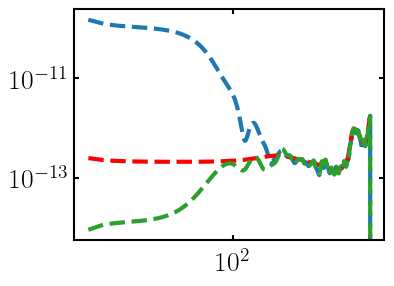

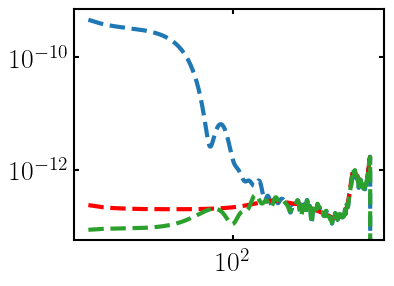

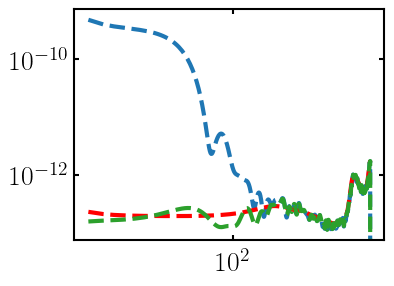

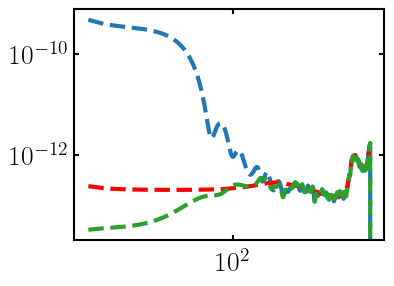

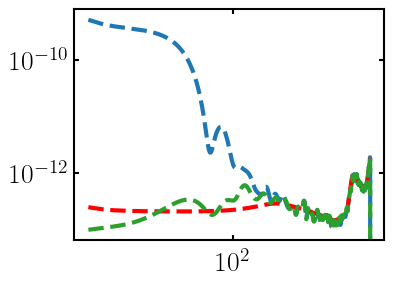

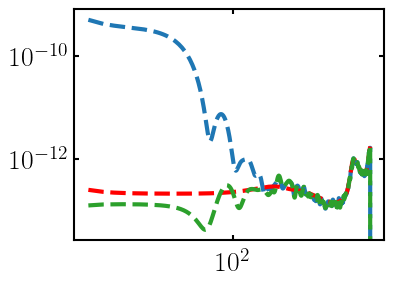

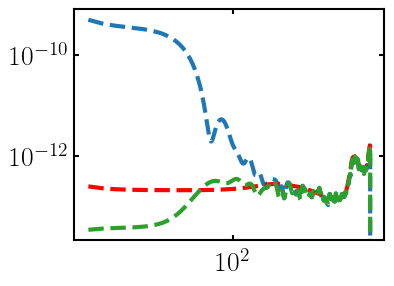

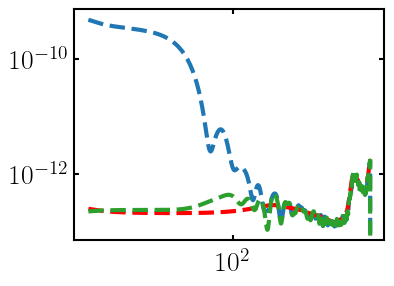

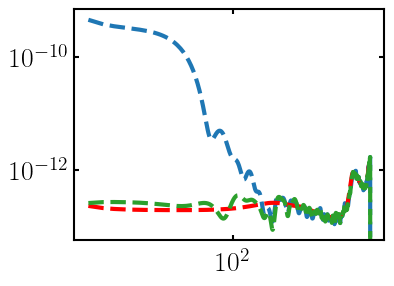

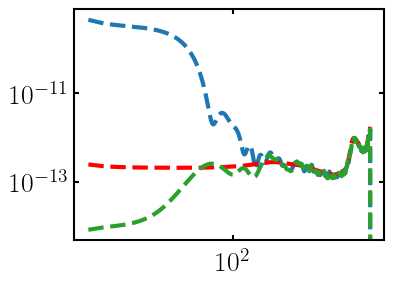

In [38]:
for n in range(10):
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    ax.loglog(ell_arr[2:], (raw_4pt_g[n][:args.mlmax+1]*lfac)[2:], color='tab:blue', linestyle='dashed', linewidth = 3, label='raw cl')
    ax.loglog(ell_arr[2:], (n0_2pt_g[n][:args.mlmax+1]*lfac)[2:], linestyle = 'dashed', color ='r', linewidth = 3, label='analytic N0')
    ax.loglog(ell_arr[2:], (rawmf_4pt_g[n][:args.mlmax+1]*lfac)[2:], color='tab:green', linestyle='dashed', linewidth = 3, label='mf sub cl')

    plt.show()

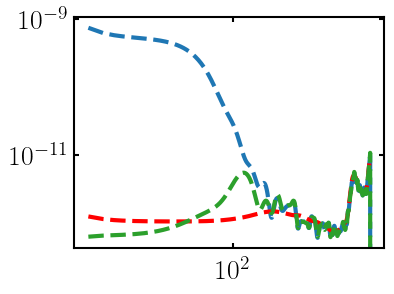

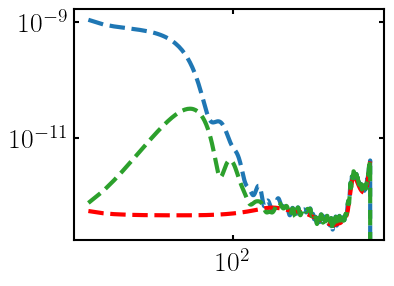

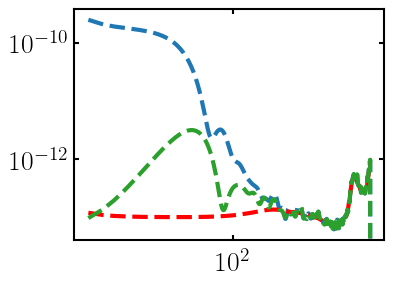

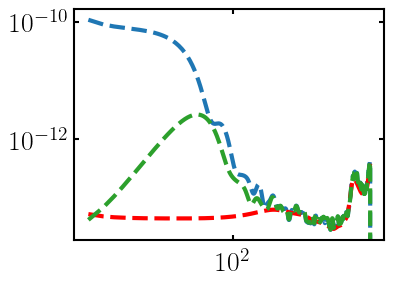

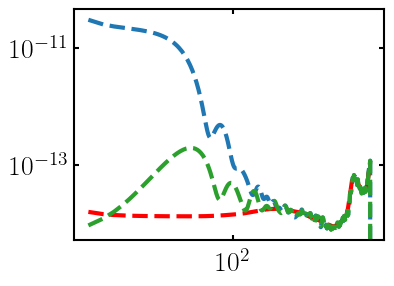

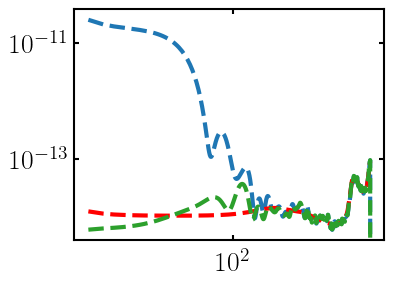

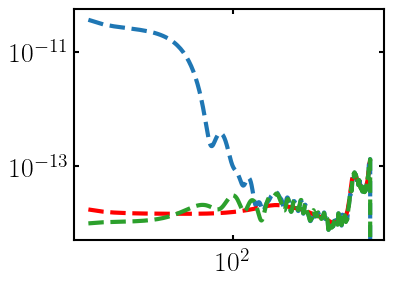

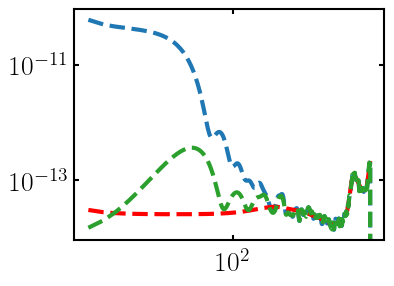

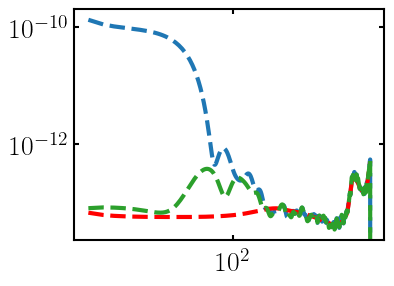

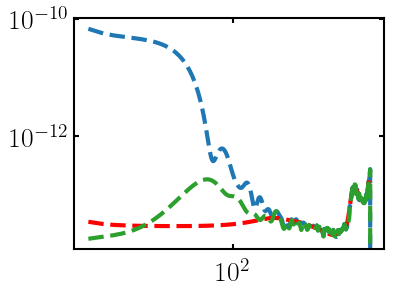

In [39]:
for n in range(10):
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    ax.loglog(ell_arr[2:], (raw_4pt_d9[n][:args.mlmax+1]*lfac)[2:], color='tab:blue', linestyle='dashed', linewidth = 3, label='raw cl')
    ax.loglog(ell_arr[2:], (n0_2pt_d9[n][:args.mlmax+1]*lfac)[2:], linestyle = 'dashed', color ='r', linewidth = 3, label='analytic N0')
    ax.loglog(ell_arr[2:], (rawmf_4pt_d9[n][:args.mlmax+1]*lfac)[2:], color='tab:green', linestyle='dashed', linewidth = 3, label='mf sub cl')

    plt.show()

In [40]:
cl_nobias_g = {}
cl_nobias_d9 = {}
for n in range(10):
    cl_nobias_g[n] = rawmf_4pt_g[n][:args.mlmax+1] - n0_2pt_g[n][:args.mlmax+1]
    cl_nobias_d9[n] = rawmf_4pt_d9[n][:args.mlmax+1] - n0_2pt_d9[n][:args.mlmax+1]



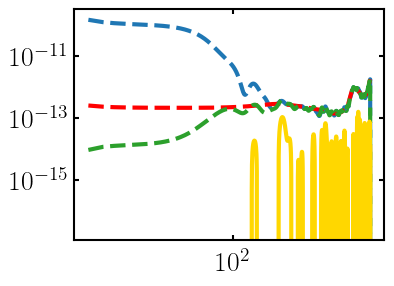

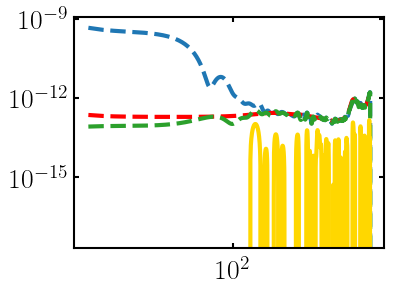

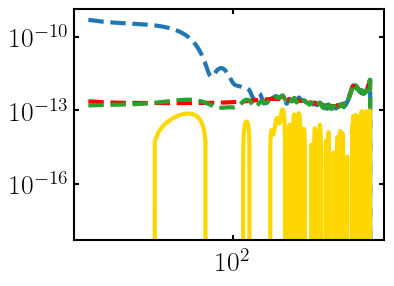

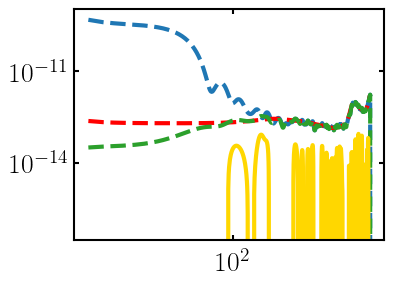

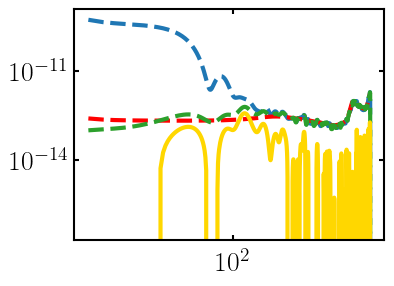

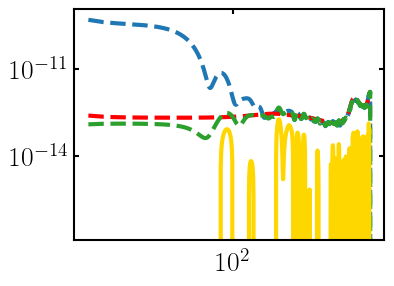

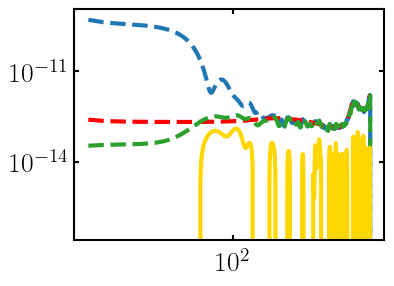

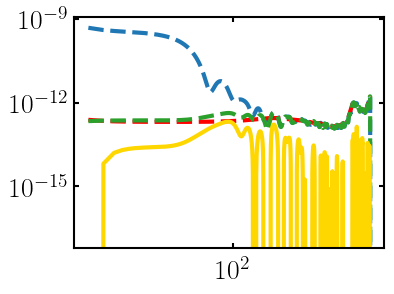

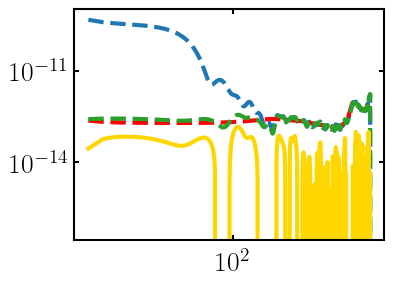

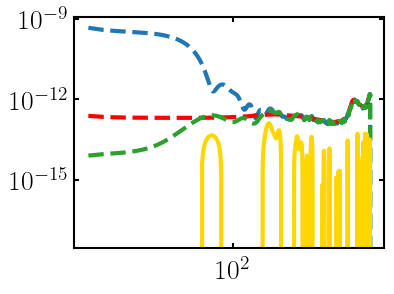

In [41]:
for n in range(10):
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    ax.loglog(ell_arr[2:], (raw_4pt_g[n][:args.mlmax+1]*lfac)[2:], color='tab:blue', linestyle='dashed', linewidth = 3, label='raw cl')
    ax.loglog(ell_arr[2:], (n0_2pt_g[n][:args.mlmax+1]*lfac)[2:], linestyle = 'dashed', color ='r', linewidth = 3, label='analytic N0')
    ax.loglog(ell_arr[2:], (rawmf_4pt_g[n][:args.mlmax+1]*lfac)[2:], color='tab:green', linestyle='dashed', linewidth = 3, label='mf sub cl')
    ax.loglog(ell_arr[2:], (cl_nobias_g[n][:args.mlmax+1]*lfac)[2:], color='gold', linestyle='solid', linewidth = 3, label='unbiased')

    plt.show()

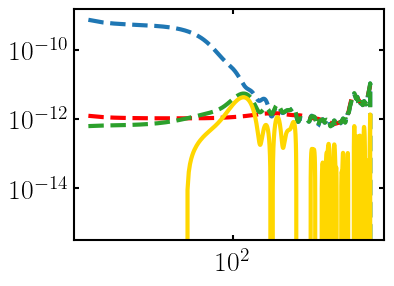

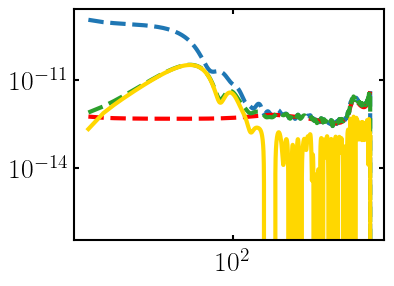

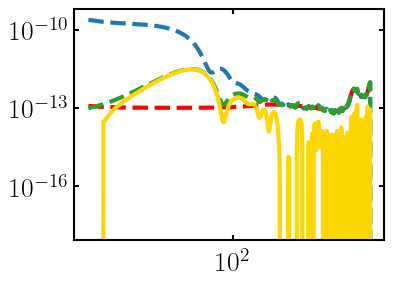

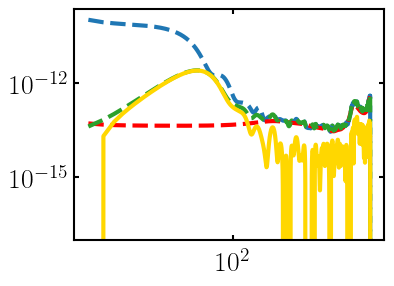

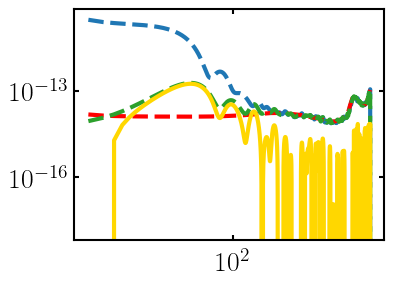

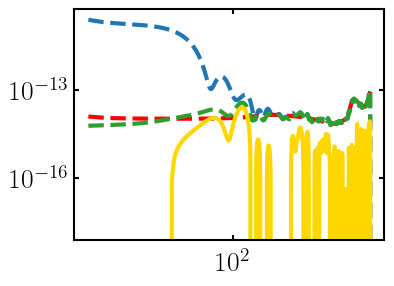

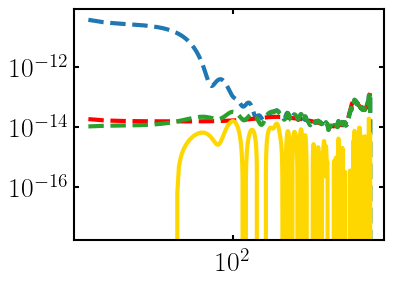

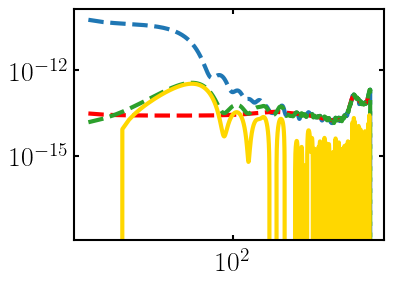

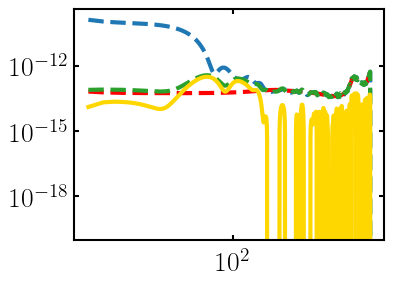

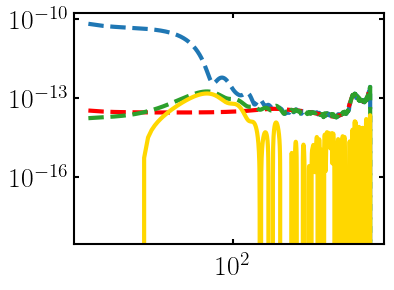

In [42]:
for n in range(10):
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    ax.loglog(ell_arr[2:], (raw_4pt_d9[n][:args.mlmax+1]*lfac)[2:], color='tab:blue', linestyle='dashed', linewidth = 3, label='raw cl')
    ax.loglog(ell_arr[2:], (n0_2pt_d9[n][:args.mlmax+1]*lfac)[2:], linestyle = 'dashed', color ='r', linewidth = 3, label='analytic N0')
    ax.loglog(ell_arr[2:], (rawmf_4pt_d9[n][:args.mlmax+1]*lfac)[2:], color='tab:green', linestyle='dashed', linewidth = 3, label='mf sub cl')
    ax.loglog(ell_arr[2:], (cl_nobias_d9[n][:args.mlmax+1]*lfac)[2:], color='gold', linestyle='solid', linewidth = 3, label='unbiased')

    plt.show()

In [45]:
reconstructed_cl_g = np.mean(np.asarray(list(cl_nobias_g.values())), axis=0)
reconstructed_cl_d9 = np.mean(np.asarray(list(cl_nobias_d9.values())), axis=0)

In [46]:
reconstructed_cl_d9.shape

(4001,)

In [55]:
# signal
lk, clkk=np.loadtxt('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/sslp/extra/clkk_raw_plikHM_TTTEEE_lowl_lowE_dr6_accuracy.txt',unpack=True)
clpp = clkk * 4 / (lk * (lk+1))**2

/tmp/ipykernel_326865/621840297.py:3: RuntimeWarning: invalid value encountered in divide
  clpp = clkk * 4 / (lk * (lk+1))**2


In [ ]:
reconstructed_cl = np.mean(np.asarray(list(cl_nobias.values())), axis=0)

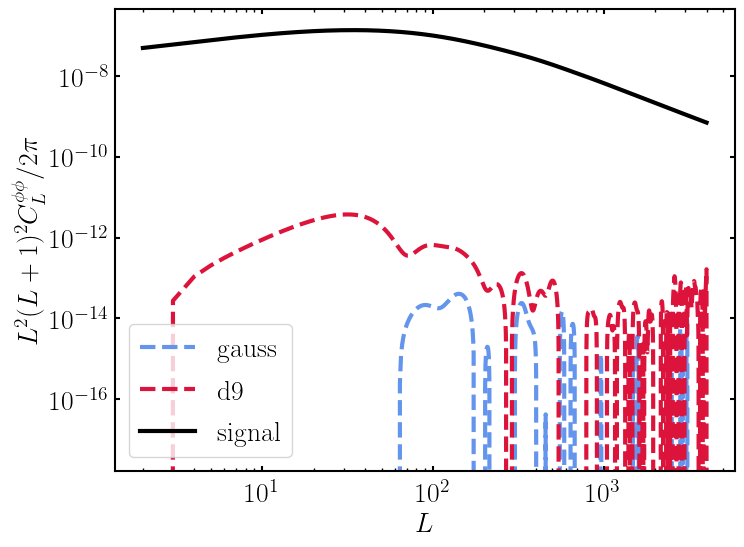

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.loglog(ell_arr[2:], (reconstructed_cl_g[:args.mlmax+1]*lfac)[2:], color='cornflowerblue', linestyle='dashed', linewidth = 3, label='gauss')
ax.loglog(ell_arr[2:], (reconstructed_cl_d9[:args.mlmax+1]*lfac)[2:], color='crimson', linestyle='dashed', linewidth = 3, label='d9')
ax.loglog(ell_arr[2:], (clpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='signal')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$')
ax.legend()
fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/patch_subtraction.png', bbox_inches='tight')
plt.show()